In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Dry_Bean_Dataset.csv")

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.shape

(13611, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

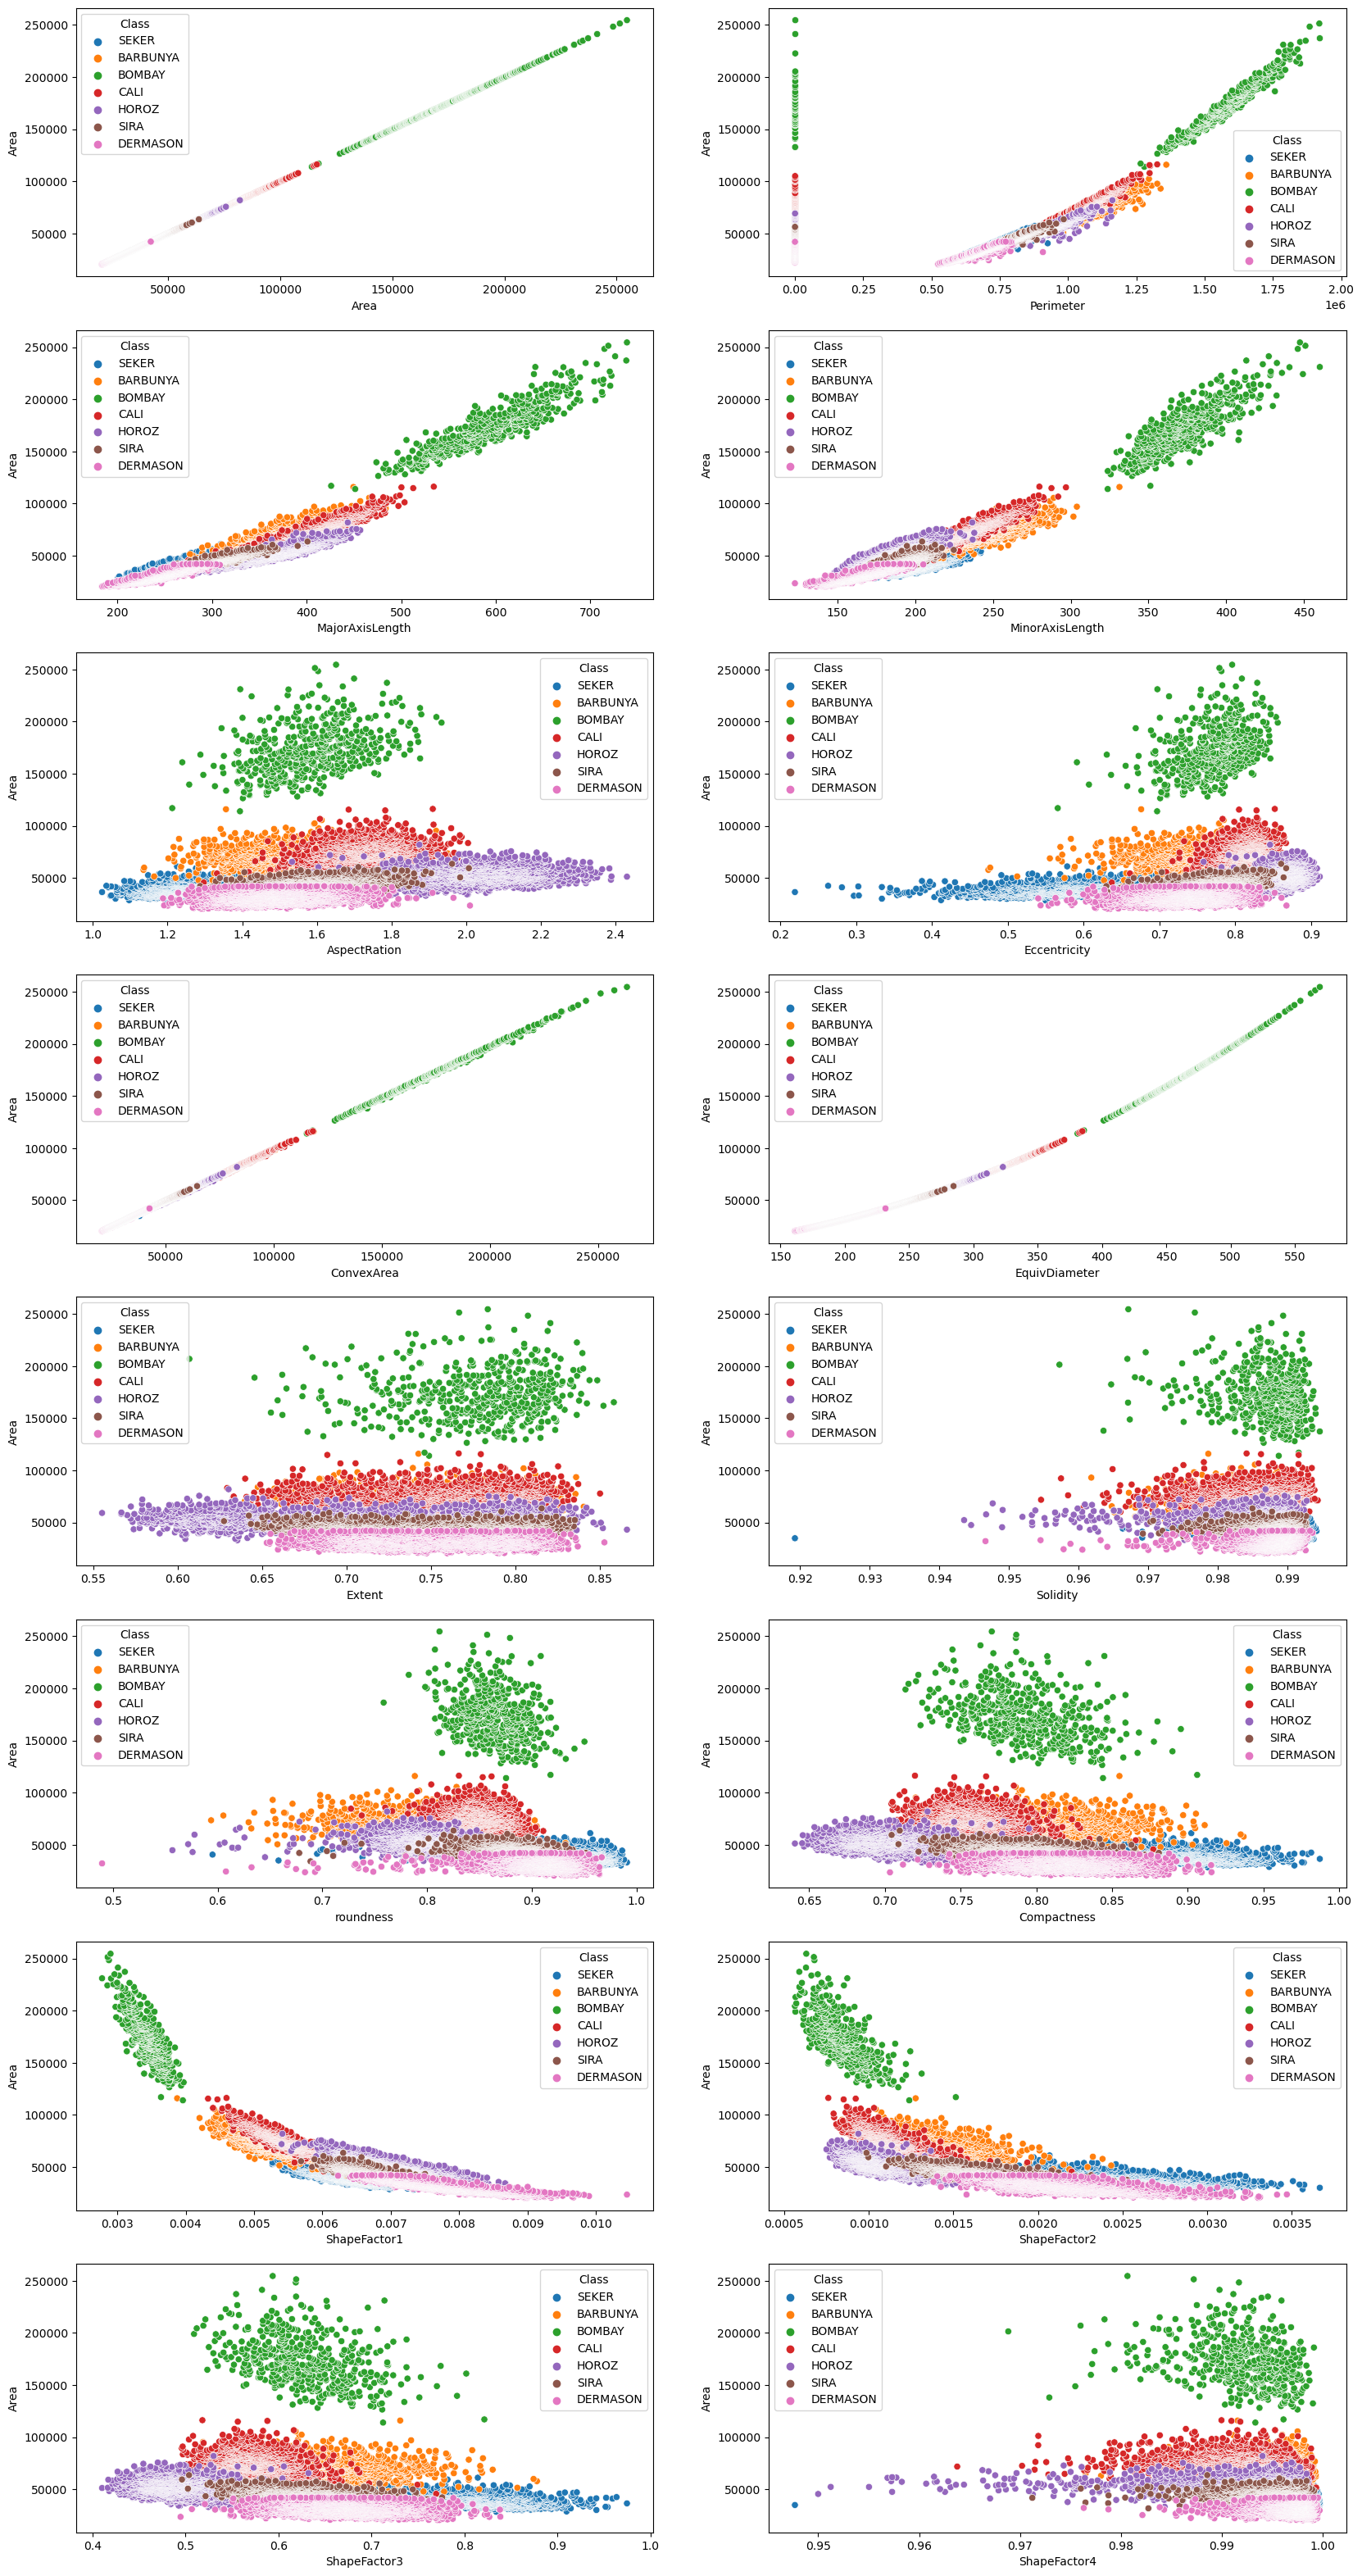

In [7]:
 plt.figure(figsize=(20,40))
features=[fea for fea in df.columns if df[fea].dtype!="object"]
count=1
for col in features:
    plt.subplot(8,2,count)
    sns.scatterplot(x=col,y="Area",hue="Class",data=df)
    count+=1;

Among the All Classes area of BOMBAY Class is greater


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder();
df["Class"]=le.fit_transform(df["Class"])

In [10]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


<Axes: >

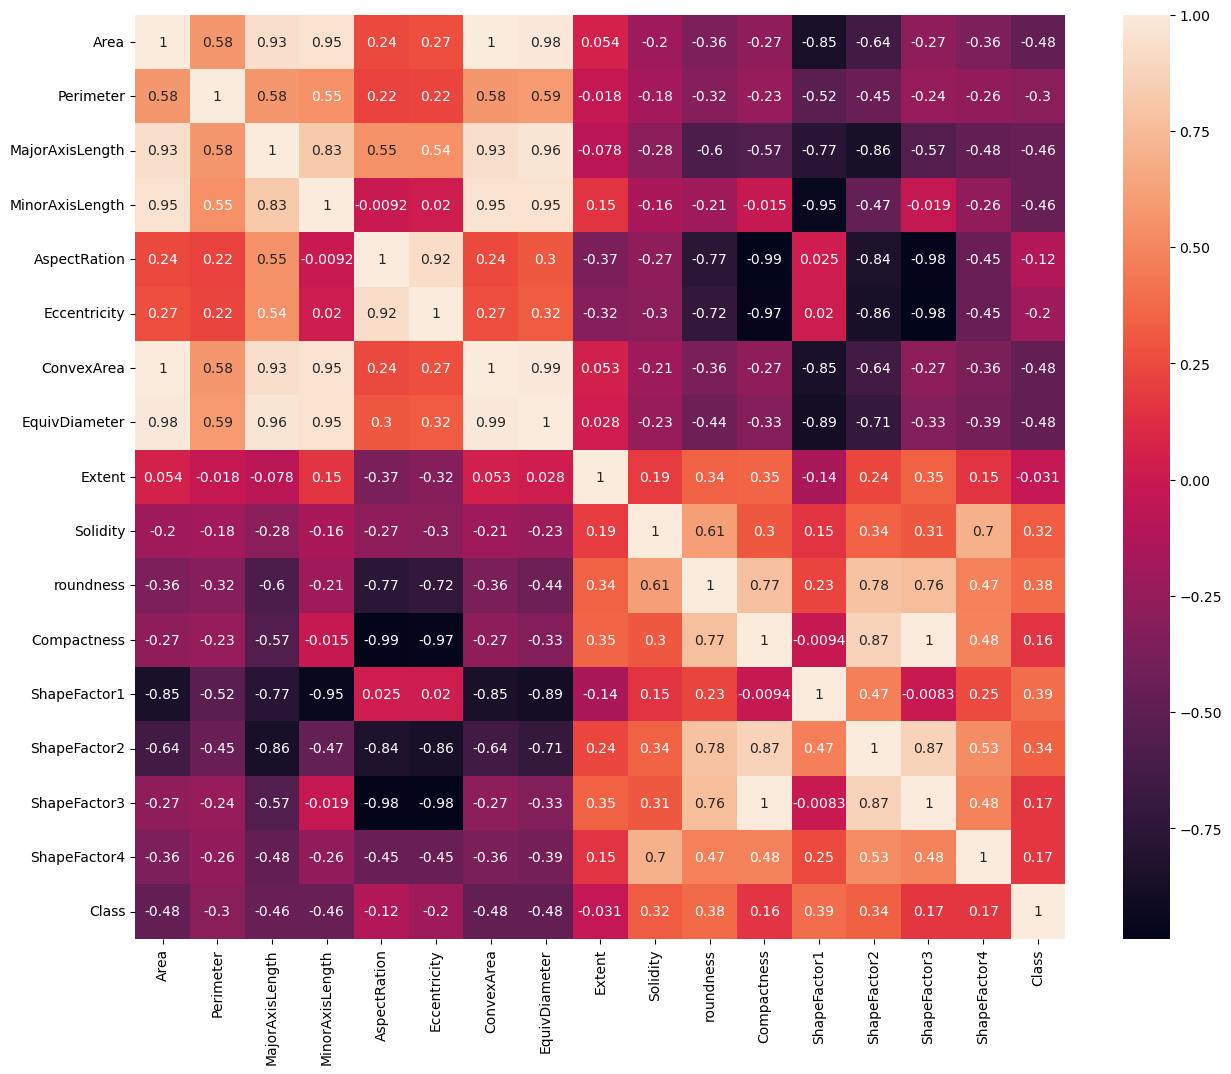

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

There is a multicolinearity in some independent features

In [12]:
#split the data into a dependent and independent Feature

X=df.drop("Class",axis=1)
y=df["Class"]

In [13]:
# step one Standardaze the data
from sklearn.preprocessing import StandardScaler
stSc=StandardScaler()
X[X.columns]=stSc.fit_transform(X)

In [14]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-0.502111,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367613,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-0.416500,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100893,2.689702,0.771138
2,-0.807157,-2.384537,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.392213,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-0.471719,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


Model Building

In [15]:
# split the data first
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 1.Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred=LR.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f"Testing accuracy_score:{accuracy_score(y_pred,y_test)}")
print(f"Training accuracy_score:{accuracy_score(LR.predict(X_train),y_train)}")
print(f"classification_report:\n {classification_report(y_pred,y_test)}")
print(f"confusion_matrix:\n {confusion_matrix(y_pred,y_test)}")

Testing accuracy_score:0.9234194122885129
Training accuracy_score:0.9255400811492488
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       445
           1       1.00      1.00      1.00       178
           2       0.93      0.94      0.94       522
           3       0.90      0.92      0.91      1126
           4       0.96      0.97      0.96       628
           5       0.94      0.95      0.94       658
           6       0.90      0.84      0.87       935

    accuracy                           0.92      4492
   macro avg       0.94      0.94      0.94      4492
weighted avg       0.92      0.92      0.92      4492

confusion_matrix:
 [[ 413    0   20    0    3    8    1]
 [   0  178    0    0    0    0    0]
 [  22    0  493    0    6    0    1]
 [   0    0    0 1041    5   12   68]
 [   0    0    7    1  610    0   10]
 [   2    0    2   20    0  624   10]
 [  13    0    6   93   14   20  789]]


### 2.Decision Tree

In [20]:
from sklearn import tree
DT=tree.DecisionTreeClassifier(criterion="gini",max_depth=6, random_state=0)

In [21]:
# fit the model
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [22]:
feature_names=[X.columns]
feature_names

[Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
        'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
        'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
        'ShapeFactor3', 'ShapeFactor4'],
       dtype='object')]

[Text(0.5, 0.8333333333333334, 'x[2] <= -0.455\ngini = 0.827\nsamples = 9119\nvalue = [872, 344, 1102, 2391, 1290, 1363, 1757]'),
 Text(0.25, 0.5, 'x[12] <= 0.229\ngini = 0.543\nsamples = 3902\nvalue = [4, 0, 0, 2294, 9, 1258, 337]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[11] <= -1.158\ngini = 0.788\nsamples = 5217\nvalue = [868, 344, 1102, 97, 1281, 105, 1420]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

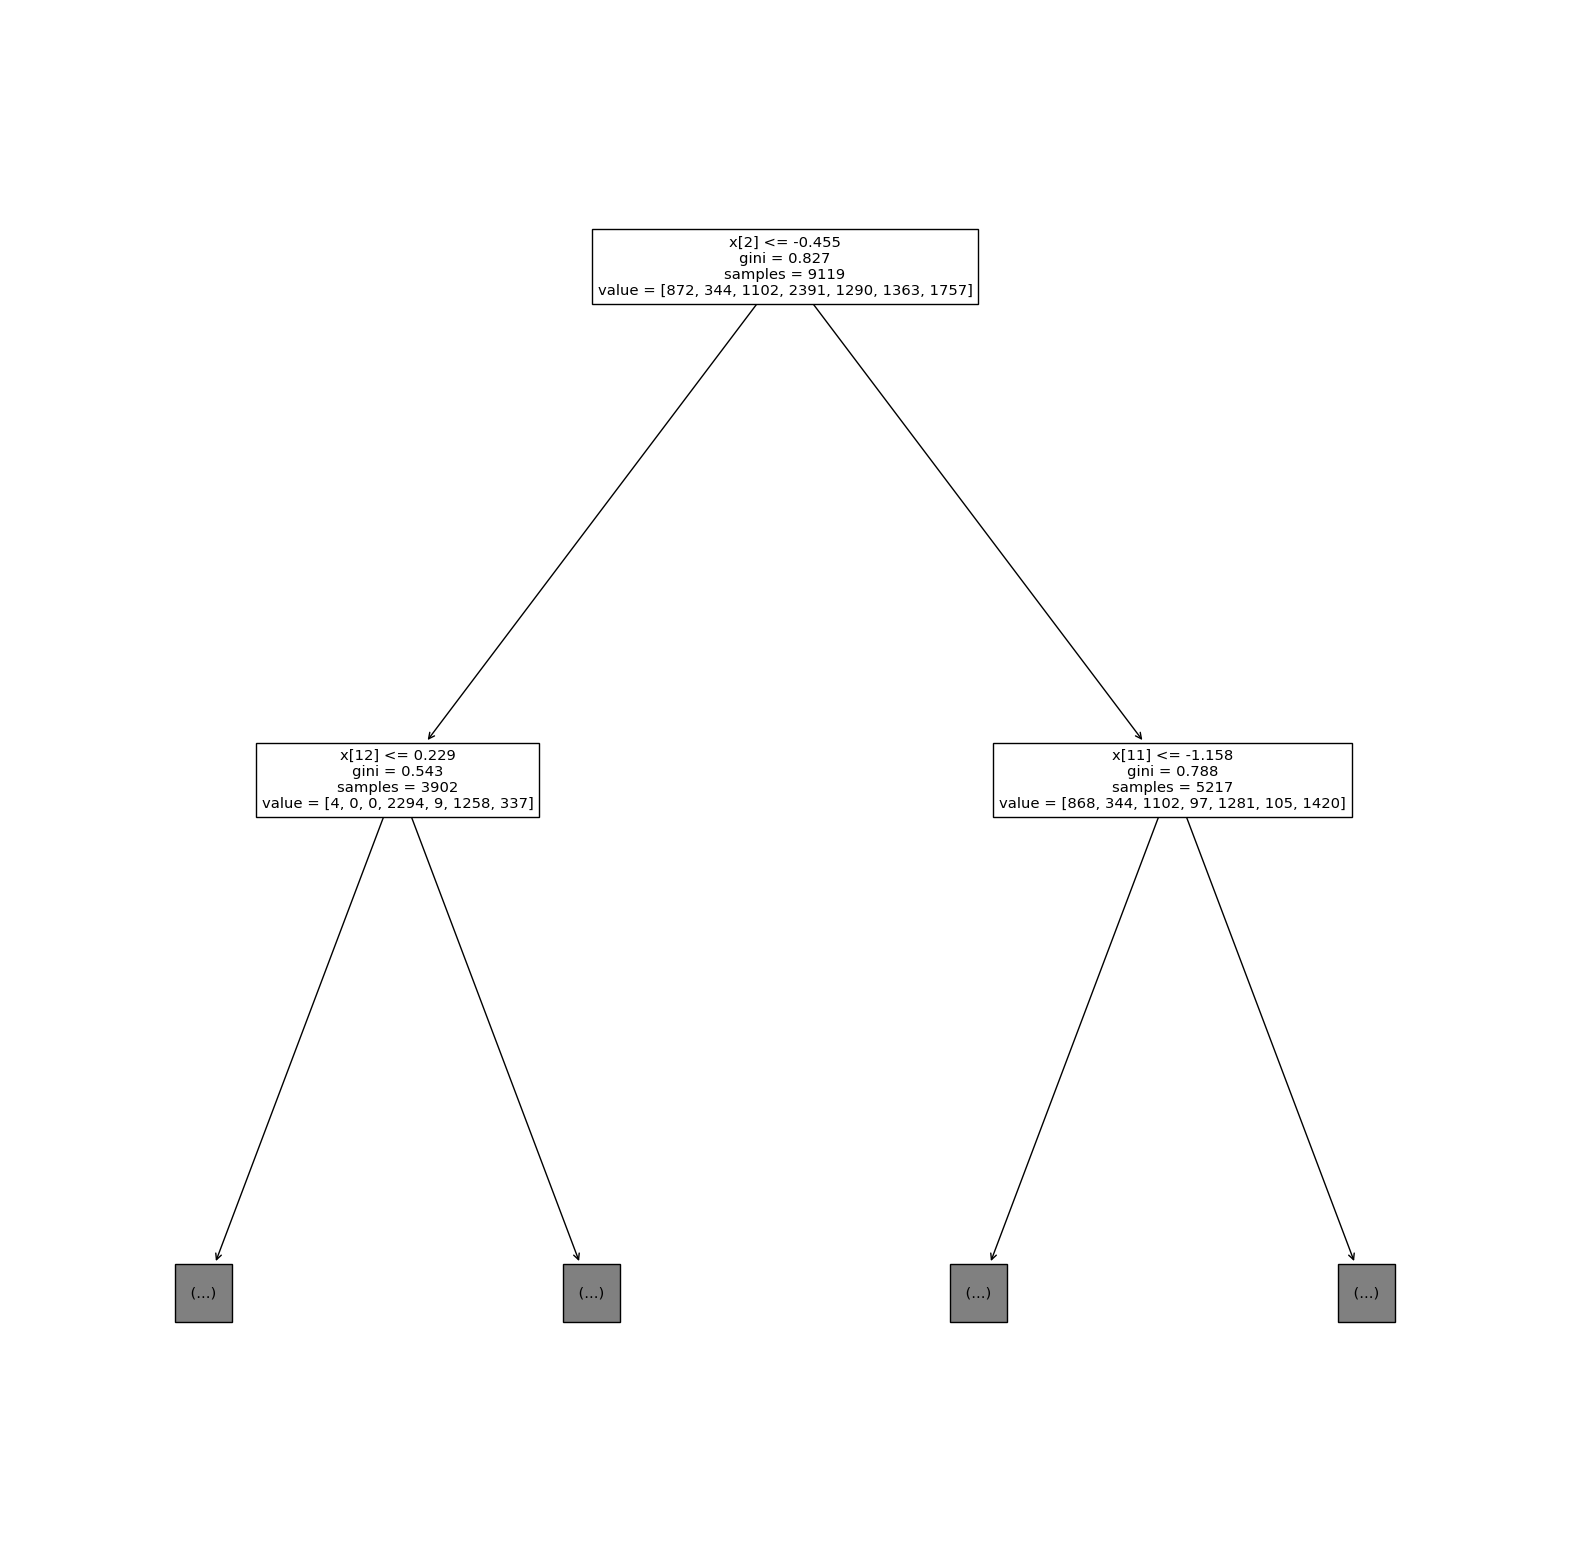

In [23]:
plt.figure(figsize=(20,20))
tree.plot_tree(DT,max_depth=1)

In [25]:
y_pred=DT.predict(X_test)

In [26]:
print(f"Testing accuracy_score:{accuracy_score(y_pred,y_test)}")
print(f"Training accuracy_score:{accuracy_score(DT.predict(X_train),y_train)}")
print(f"classification_report:\n {classification_report(y_pred,y_test)}")
print(f"confusion_matrix:\n {confusion_matrix(y_pred,y_test)}")

Testing accuracy_score:0.9051647373107747
Training accuracy_score:0.9178638008553569
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       399
           1       0.99      1.00      1.00       177
           2       0.95      0.84      0.89       597
           3       0.91      0.90      0.91      1172
           4       0.92      0.97      0.95       606
           5       0.92      0.95      0.93       642
           6       0.87      0.85      0.86       899

    accuracy                           0.91      4492
   macro avg       0.91      0.92      0.91      4492
weighted avg       0.91      0.91      0.90      4492

confusion_matrix:
 [[ 370    0   18    1    7    1    2]
 [   0  177    0    0    0    0    0]
 [  66    1  499    0   18    4    9]
 [   0    0    0 1055    6   30   81]
 [   2    0    8    1  589    0    6]
 [   4    0    1   14    0  609   14]
 [   8    0    2   84   18   20  767]]


### 3.Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
RFC=RandomForestClassifier(n_estimators=10,max_depth=6,random_state=0)

In [29]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=0)

In [30]:
y_pred=RFC.predict(X_test)

In [31]:
print(f"Testing accuracy_score:{accuracy_score(y_pred,y_test)}")
print(f"Training accuracy_score:{accuracy_score(DT.predict(X_train),y_train)}")
print(f"classification_report:\n {classification_report(y_pred,y_test)}")
print(f"confusion_matrix:\n {confusion_matrix(y_pred,y_test)}")

Testing accuracy_score:0.8871326803205699
Training accuracy_score:0.9178638008553569
classification_report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75       361
           1       0.99      1.00      1.00       177
           2       0.89      0.78      0.83       597
           3       0.91      0.90      0.91      1165
           4       0.94      0.97      0.96       616
           5       0.92      0.94      0.93       650
           6       0.88      0.83      0.85       926

    accuracy                           0.89      4492
   macro avg       0.89      0.90      0.89      4492
weighted avg       0.89      0.89      0.89      4492

confusion_matrix:
 [[ 304    1   45    0    3    5    3]
 [   0  177    0    0    0    0    0]
 [ 116    0  468    0   10    0    3]
 [   0    0    0 1052    7   16   90]
 [   1    0    8    3  599    0    5]
 [   5    0    1   23    0  614    7]
 [  24    0    6   77   19   29  771]]
